1. รหัส ชื่อ และหมู่ของนิสิตในกลุ่ม
- 6610402167 นายพงษ์ศิริ กิตตยุทธนาวิน หมู่ 1
- 6610402060 นายธนกฤต ตระการจันทร์ หมู่ 1
2. วัตถุประสงค์ของระบบต้นแบบ
- ทำนายความพึงพอใจของผู้ใช้ จากรีวิวของผู้ใช้เอง
3. ลิงค์ไปยังข้อมูลที่จะใช้ในระบบต้นแบบ
- Data set: https://amazon-reviews-2023.github.io/
4. ใช้ baseline และ วิธีการประเมินอะไรได้บ้าง อย่างไร มีค่าเป็นเท่าไหร่
- ใช้ Zero Rule Baseline และ วิธีการประเมินคือ accuracy score = 0.17615
5. training score, test score ปัจจุบันมีค่าเท่าไหร่
- training score: 85.76%
- test score: 81.77%
6. จากการประเมินด้วยวิธีต่าง ๆ สามารถนำโมเดลไปใช้งานจริงได้แล้วหรือไม่ เพราะเหตุใด
- ใช้ได้จริง เนื่องจาก trianing score และ test score มีค่าสูง และ ใกล้เคียงกัน บ่งชี้ว่าโมเดลใช้งานได้จริง และโมเดลใช้เวลาไม่นาน
7. nำอะไรได้บ้างเพื่อให้คะแนนต่าง ๆ มีค่าสูงขึ้น และ/หรือ โมเดลมีประโยชน์มากขึ้น
- ปรับเปลี่ยน hyperparameter ของโมเดล
8. ปร​ะเด็น​อื่น ๆ ที่เกี่ยว​ข้องกั​บข้อมูลของ​ตัวเอง
- ลืมexport column title ในข้อมูลที่นำมาใช้ ซึ่งไม่ได้ใช้ในการทำโมเดล
9. ก​าร​มีส่วน​ร่วมของสม​าชิกแต่ละ​คนในกลุ่ม (แต่ล​ะคนทำอะไรบ้าง)
- นายพงษ์ศิริ เตรียมโมเดล SVC
- นายธนกฤต ทำการทดสอบ หา baseline และ การประเมินคะแนนต่างๆ
10. กา​รเปิ​ดเผ​ยกา​รใช้เค​รื่อ​งมือปัญ​ญาป​ระดิษฐ์ (ใช้อะไร ใช้เพื่ออะไร ใช้อย่างไร, pro​mpt อย่างไร)
- ChatGPT: ใช้ช่วยการหา baseline `zero rule baseline with sklearn`

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,precision_score
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataUrl = "../assets/my_data/Review.csv"

df = pd.read_csv(dataUrl)
df.head()

,rating,helpful_vote,text,Review,transform_text,Sentiment
0,5.0,0,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...,lot fun love play tap fun watch town grow earn...,Positive
1,5.0,0,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...,light dark love flashlight app really illumina...,Positive
2,4.0,0,One of my favorite games,Fun game One of my favorite games,fun game one favorite game,Positive
3,4.0,0,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...,good kid cute game good kid love nik wallenda,Positive
4,4.0,0,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl...",good game make think variety puzzle keep fun p...,Positive


In [22]:
data = df.sample(n=100_000, random_state=123)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3571354 to 870538
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rating          100000 non-null  float64
 1   helpful_vote    100000 non-null  int64  
 2   text            100000 non-null  object 
 3   Review          100000 non-null  object 
 4   transform_text  100000 non-null  object 
 5   Sentiment       100000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ MB


In [23]:
# Split the data into X and Y
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

X = data['transform_text']
Y = data['Sentiment']

# Vectorizing the text data
vect = TfidfVectorizer()
X = vect.fit_transform(data['transform_text'])

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=123)

# Encoding the target variable
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

In [24]:
ros = RandomOverSampler()
ros_X_train, ros_y_train = ros.fit_resample(x_train, y_train)

In [25]:
c = 0.1
svc=LinearSVC(C=c)
svc.fit(ros_X_train,ros_y_train)
svc_pred=svc.predict(x_test)

In [ ]:
print("Test accuracy: {:.2f}%".format(svc_acc*100))
# Plot confusion matrix
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LinearSVC')
plt.show()
print(classification_report(y_test, svc_pred))

In [29]:
zero_rule = DummyClassifier(strategy='most_frequent')
zero_rule.fit(ros_X_train, ros_y_train)
zero_rule_pred = zero_rule.predict(x_test)



In [30]:
print(classification_report(y_test, svc_pred))
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"SVC Accuracy: {svc_accuracy}")
print("\n--------------\n")
print(classification_report(y_test, zero_rule_pred))
zero_rule_accuracy = accuracy_score(y_test, zero_rule_pred)
print(f'Zero Rule Classifier Accuracy: {zero_rule_accuracy}')

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3523
           1       0.34      0.55      0.42      1688
           2       0.96      0.85      0.90     14789

    accuracy                           0.82     20000
   macro avg       0.66      0.73      0.69     20000
weighted avg       0.86      0.82      0.83     20000

SVC Accuracy: 0.8177

--------------

              precision    recall  f1-score   support

           0       0.18      1.00      0.30      3523
           1       0.00      0.00      0.00      1688
           2       0.00      0.00      0.00     14789

    accuracy                           0.18     20000
   macro avg       0.06      0.33      0.10     20000
weighted avg       0.03      0.18      0.05     20000

Zero Rule Classifier Accuracy: 0.17615


/Users/thanakrittrakanjan/KU/MlLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thanakrittrakanjan/KU/MlLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thanakrittrakanjan/KU/MlLab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Test accuracy: 81.77%


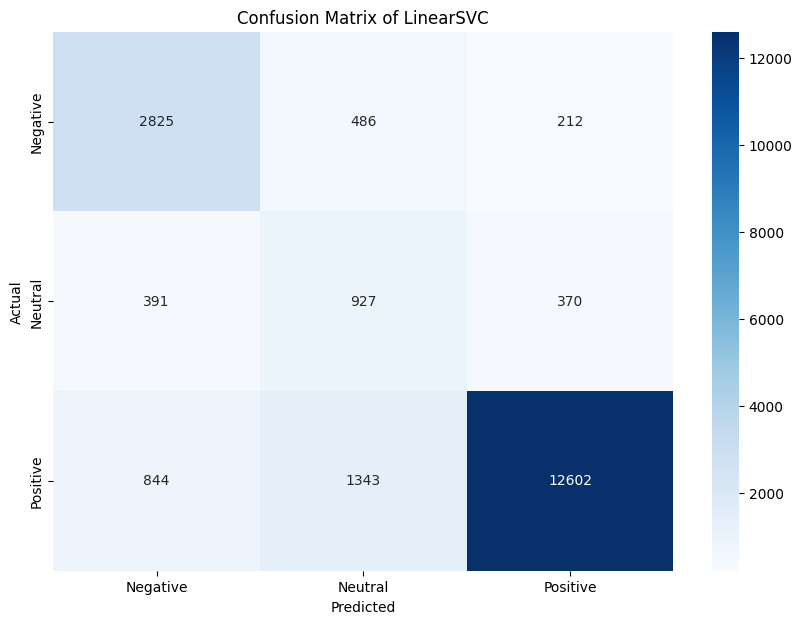

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3523
           1       0.34      0.55      0.42      1688
           2       0.96      0.85      0.90     14789

    accuracy                           0.82     20000
   macro avg       0.66      0.73      0.69     20000
weighted avg       0.86      0.82      0.83     20000



In [34]:
print("Test accuracy: {:.2f}%".format(svc_accuracy*100))
# Plot confusion matrix
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LinearSVC')
plt.show()
print(classification_report(y_test, svc_pred))

In [32]:
train_pred = svc.predict(ros_X_train)
train_score = accuracy_score(ros_y_train, train_pred)
print(f'Training Score: {train_score * 100}')

Training Score: 85.75691187713232


In [33]:
test_pred = svc.predict(x_test)
test_score = accuracy_score(y_test, test_pred)
print(f'Test Score: {test_score * 100}')

Test Score: 81.77
